# 2024 MLB Pitcher Analysis

**Name**: RJ Burjek

**NetID**: rburjek2


## 1. Introduction

In every professional sports league, the goal of each year is to put together a team of the best possible players in order to find the most success in winning games. Along with finding the best possible players, teams and general managers are always trying to gain any sort of competitive advantage over their opponents in any way they can. This is no different in Major League Baseball. Batters are always trying to gain an edge on their counterpart pitcher, and vice versa. When it comes to pitchers, to best way they can deceive hitters in order to gain that advantage is through the pitches they throw. In baseball, there are three general groupings of pitches: fastballs, breaking balls, and offspeed pitches. Each type of pitch has different variations, like sliders and curveballs being two different forms of breaking balls. Fastballs are known for their high velocities and little-to-no movement, breaking balls are known for their vertical and horizontal movement across the strike zone, and offspeed pitches look to deceive hitters with their slower nature (Lebovitch). Each type of pitch has its own unique qualities and uses, but it leads into the question of whether there is one type of pitch that hitters struggle the most with. Is there a pitch that is most effective to use when facing batters, and should Major League pitchers aim to utilize this pitch/these pitches in their arsenals?

The next question this research motivation begs is what the importance of this study is to pitchers. In baseball today, pitching value is at an all time high. It is said that "nothing happens in a game until the pitcher delivers the ball toward the batter," and that pitching can even make for upwards to 80% of the game (Madison). Even in recent years, MLB teams have found more value in investing money towards their pitching staffs (Mahlke). These teams have found more success and have been winning more consistently. Despite only playing a small percentage of games throughout the season, many use this as reason to argue that pitching is the most valuable position in baseball. With this high amount of stress on pitching, now is more valuable a time than ever for both players and general managers to look for ways to improve their pitching game. At its very core, the following research looks to analyze and study this idea. The goal is to find groupings of pitchers from the 2024 MLB regular season and analyze certain pitch usage. By using unsupervised learning methods, the goal is to learn about the relationship between pitch types and futher hypothesize why certain conclusions may be drawn from the clustering results. With this recency being factored in, the goal is to draw conclusions based on modern-day batting tendencies, and overall look for a way to dominate the game of baseball from the mound.

When it comes to the following study, there are a few examples of results that would be useful for the given research motivation. First off, a clustering that presented well-separated clusters would be very beneficial to this study. The goal is to group pitchers based off of 2024 statistics, so if there were clear and evident groupings, then it would allow for better exploration of what might be the reasoning for those groups. A fuzzy clustering would also be beneficial in this study if the data presented a clustering in which the clusters were not well-separated. There are many factors that go into successful pitching in Major League Baseball, and there are many different types of pitchers as well. Because of the variability we see in the league today, it may lead to a fair amount of fuzziness in the dataset and a handful of points that have membership to more than one cluster. Lastly, a dendrogram that displays a nested clustering relationship would be beneficial to this study. As previously stated, there are many factors that go into having success at the professional level, so if there were to be clusters in which a certain conclusion could be drawn, then the existence of nested cluster relationships would allow for further research to be done this topic. It opens the door for more hypotheses to be made, and further analysis on the topic would be very beneficial for players and coaches in the league that are trying to gain that competitive advantage over their opponents. When it comes to a clustering structure where at least one of the clusters was a singleton outlier, that would not be very helpful in supporting our research motivation. Again, the goal of this study is to find groupings of pitchers, analyze the level of success that is shown by that cluster, and see if there are any pitch type attributes that may be the reason for that success. Singleton outliers and clusters in which there are only one or two observations would not be useful because then we would only have that player's season statistics to analyze instead of learning about a grouping as a whole.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score
from pyclustertend import hopkins

from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances

from sklearn.neighbors import NearestNeighbors

from pyclustertend import hopkins

from skfuzzy.cluster import cmeans

from scipy.spatial.distance import pdist, squareform

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## 2. Dataset Discussion

We will begin the study by reading our dataset into the variable "df."

In [2]:
df = pd.read_csv('2024MLB_AdvancedPitchStats.csv')

X = df.copy()

X['k_percent'] = X['k_percent'] / 100
X['bb_percent'] = X['bb_percent'] / 100
X['barrel_batted_rate'] = X['barrel_batted_rate'] / 100
X['hard_hit_percent'] = X['hard_hit_percent'] / 100
X['whiff_percent'] = X['whiff_percent'] / 100
X['swing_percent'] = X['swing_percent'] / 100
X['n_fastball'] = X['n_fastball'] / 100
X['n_breaking'] = X['n_breaking'] / 100
X['n_offspeed'] = X['n_offspeed'] / 100

X.head()

Name   PA  k_percent  bb_percent   woba  barrel_batted_rate  \
0  Verlander, Justin  396      0.187       0.068  0.337               0.069   
1      Chavez, Jesse  264      0.208       0.072  0.315               0.063   
2    Morton, Charlie  701      0.238       0.093  0.335               0.093   
3        Lynn, Lance  511      0.213       0.086  0.314               0.105   
4   Carrasco, Carlos  447      0.199       0.074  0.360               0.081   

   hard_hit_percent  whiff_percent  swing_percent pitch_hand  n_fastball  \
0             0.325          0.213          0.487          R       0.487   
1             0.354          0.170          0.423          R       0.780   
2             0.384          0.261          0.466          R       0.466   
3             0.393          0.241          0.484          R       0.862   
4             0.388          0.227          0.487          R       0.423   

   n_breaking  n_offspeed  
0       0.412       0.101  
1       0.086       0.134  
2       0.424       0.110  
3       0.075       0.063  
4       0.344       0.233

In [3]:
df.shape

(277, 13)

The dataset used in this research originated from the Baseball Savant MLB Database, which can be found at the following link or the reference list at the bottom of this study (https://baseballsavant.mlb.com/). The CSV file was downloaded on November 26th, 2024 and further edited on December 13th, 2024 to feature more reader-friendly column titles for each of the object attributes. Lastly, the original values denoting percentages were modified to show the rate of each variable instead of percentage value.

This dataset contains MLB pitching statistics from the 2024 MLB regular season, where each row represents one of 277 different Major League pitchers and their season statistics. This dataset was collected by game officials in each of the appearances made by a given pitcher and then compiled cumutivaly into the Baseball Savant database. Lastly, this dataset is restricted to pitchers who recorded a minimum of 250 batters faced throughout the 2024 season. This restriction removes any extreme values that may have been recorded by pitchers that only made a handful of appearances throughout the season or may have suffered an injury that shortened their playing time during the year. Because of this, any conclusions drawn may be mainly associated with starting pitchers in the league or longer relief pitchers that see a consistent and heavier workload throughout the season than other short-term relief pitchers.

Every row represents a different pitcher, their handedness, and the number of plate appearances they recorded in the 2024 season. It also includes some standard ratio statistics, like strikeout percentage, walk percentage, and weighted on base average. Next, it includes quality of batter contact statistics, like batted barrel rate, hard hit rate, whiff rate, and swing rate. Lastly, it includes variables describing a pitcher's pitch arsenal, denoting their fastball percentage, breaking ball percentage, and offspeed pitch percentage.

## 3. Dataset Cleaning and Exploration

Before performing any sort of clustering algorithm, we must check the data for any noise and outliers that may skew the final results of the clustering.

In [4]:
X.isna().sum()

Name                  0
PA                    0
k_percent             0
bb_percent            0
woba                  0
barrel_batted_rate    0
hard_hit_percent      0
whiff_percent         0
swing_percent         0
pitch_hand            0
n_fastball            0
n_breaking            0
n_offspeed            0
dtype: int64

The dataset does not contain any missing values. There are some values of zero featured throughout the data, but those do not denote any placeholders of N/A values.

Next, the pairwise relationships of each numerical variables in the dataset will be graphically represented and analyzed.

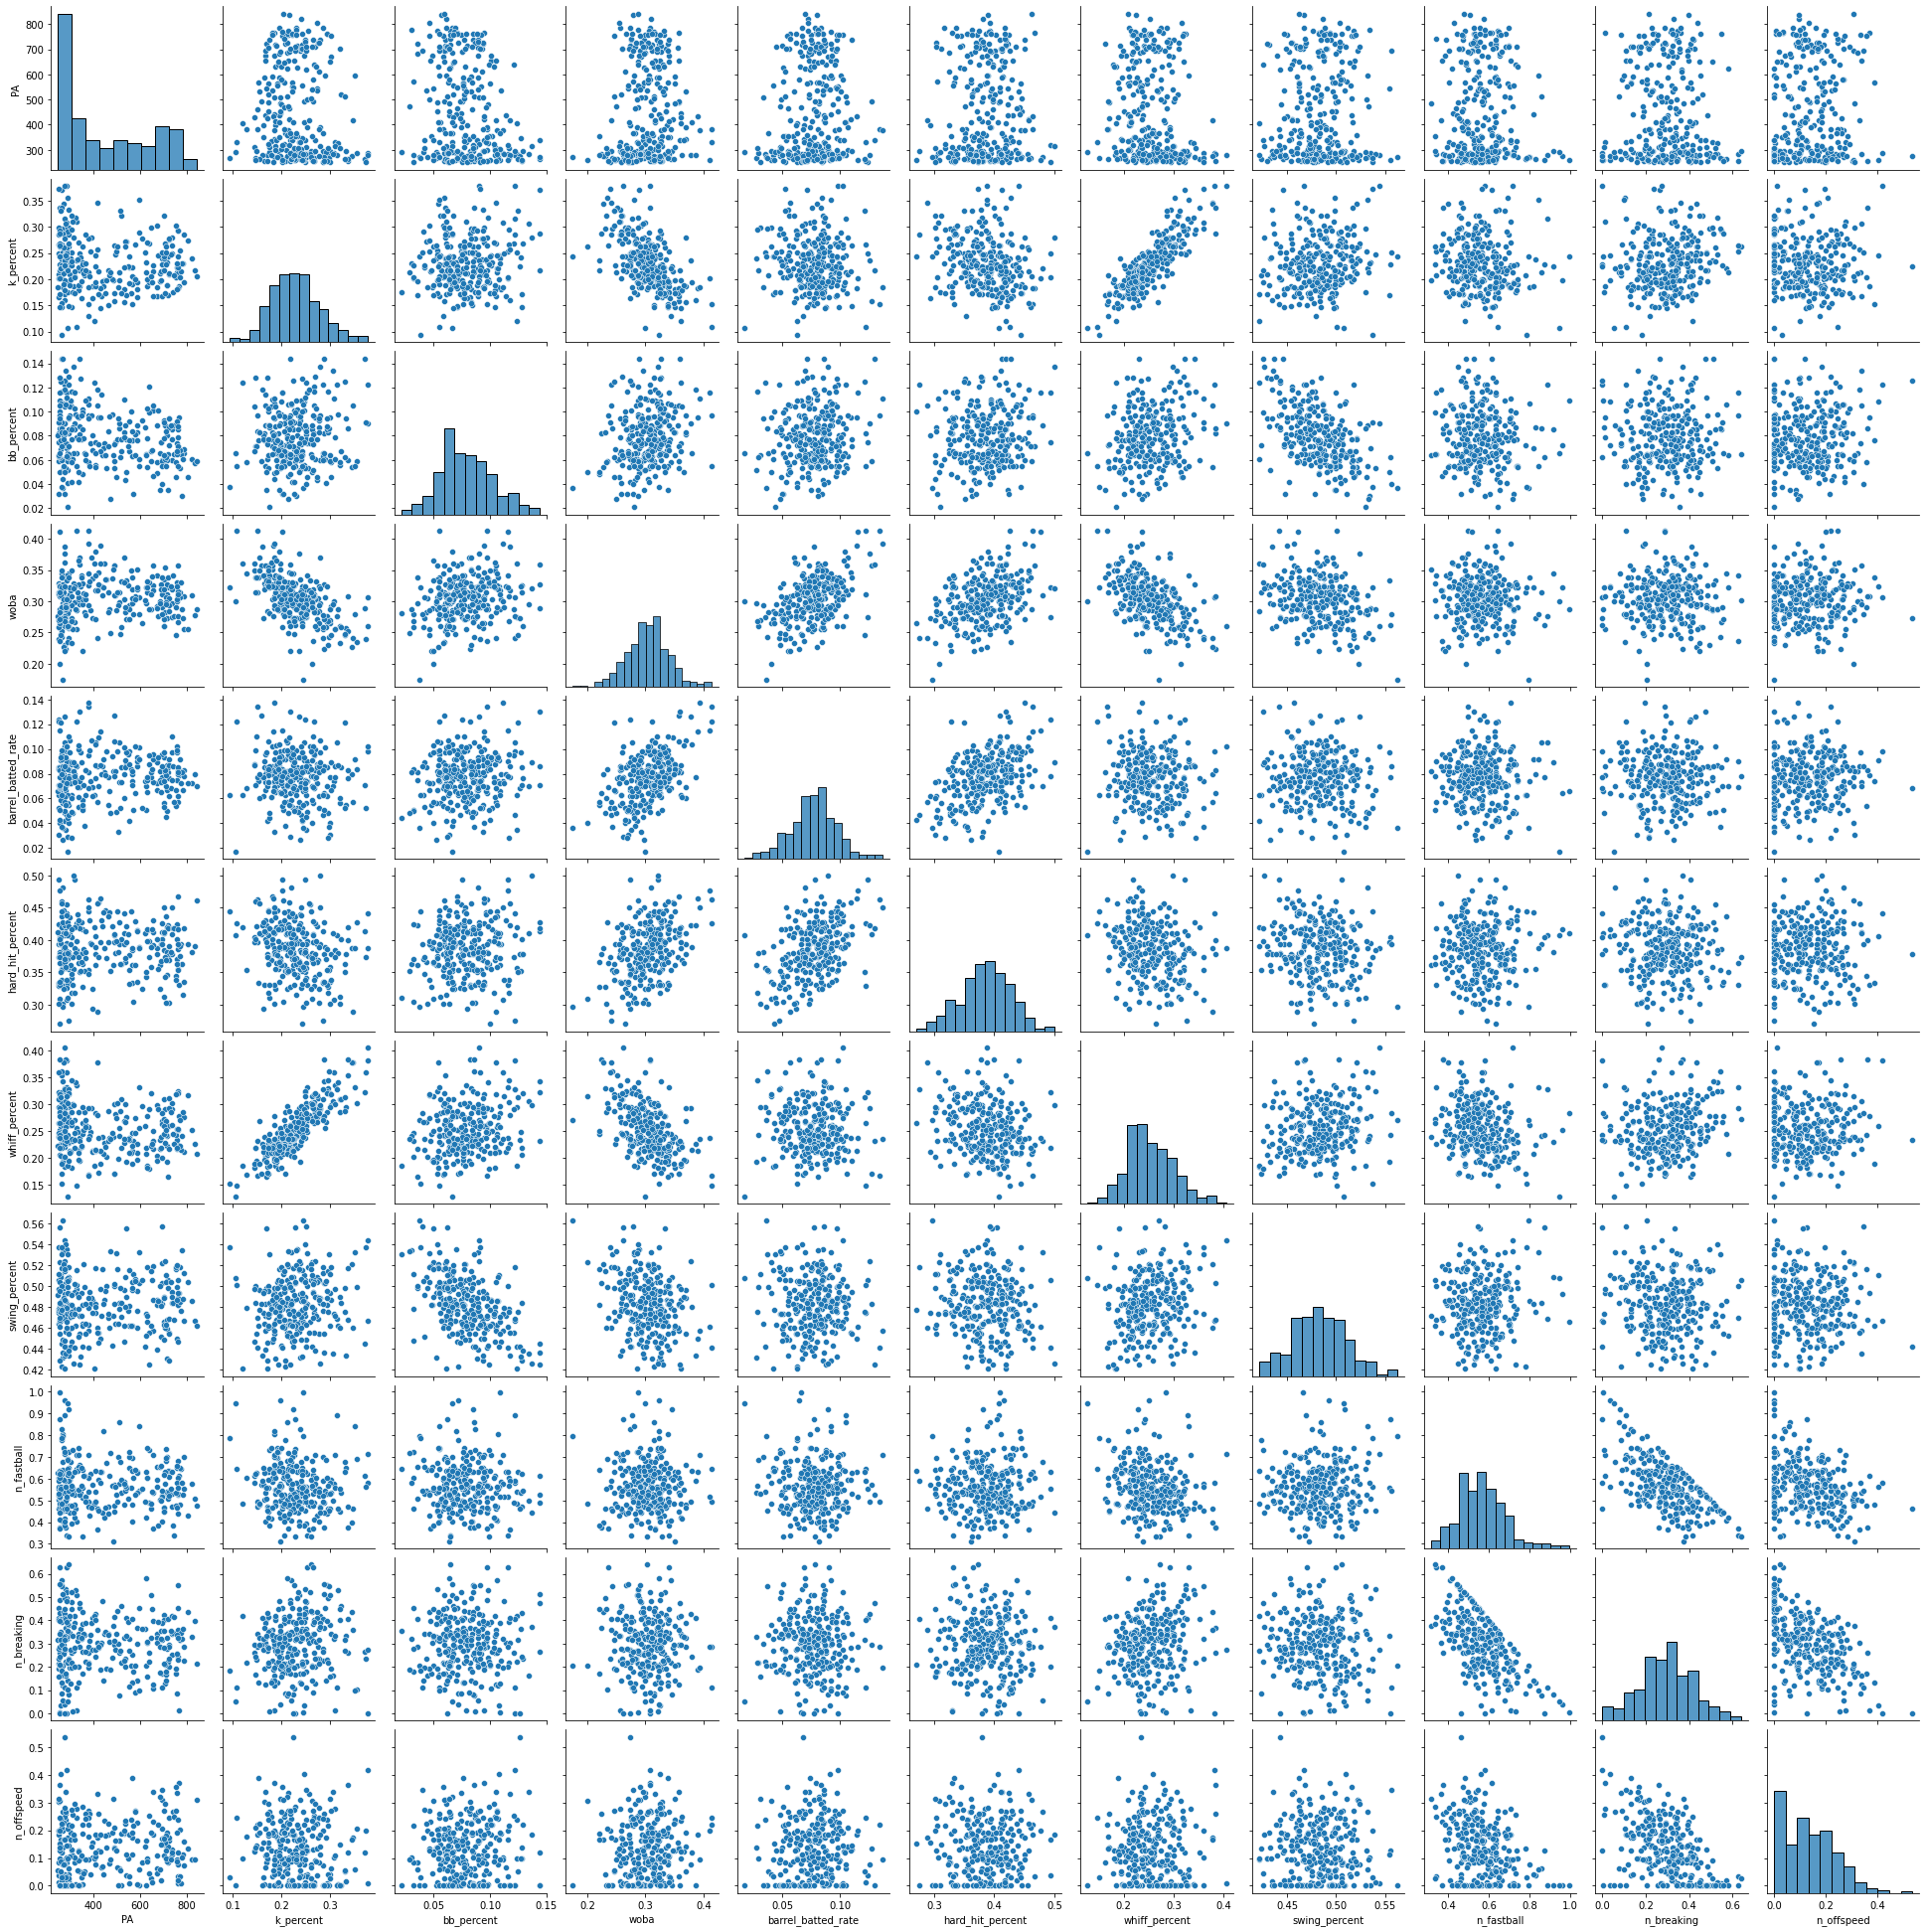

In [5]:
sns.pairplot(X.drop(['Name', 'pitch_hand'], axis = 1))
plt.show()

Each of the scatterplots above show a general distribution of points throughout each plot. There are a few points, however, that may suggest the existence of outliers in our dataset. Looking at all the pair plots with "n_offspeed" as one of the variables, there is one point that strays from the rest of the points, suggesting that that point may be an outlier to the rest.

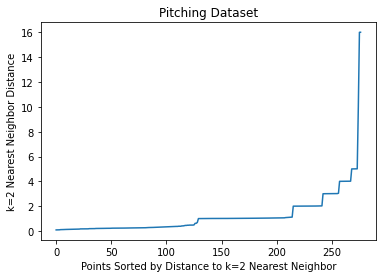

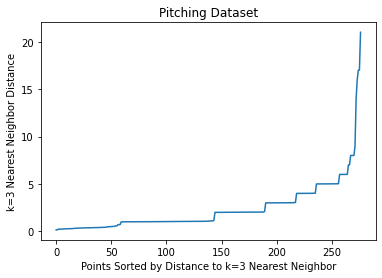

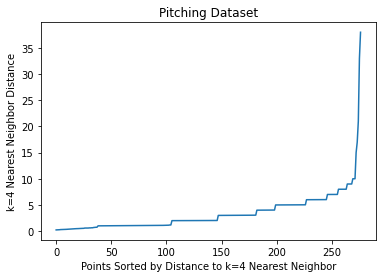

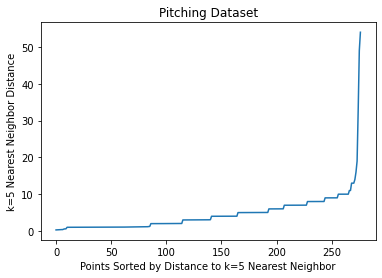

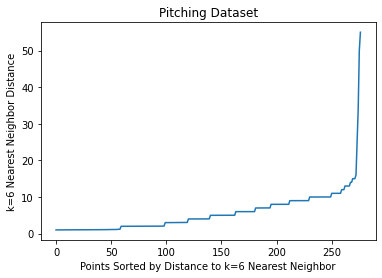

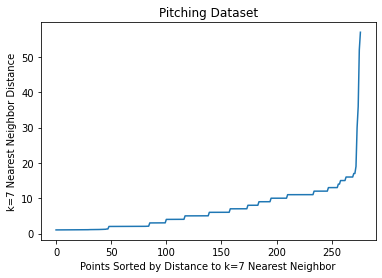

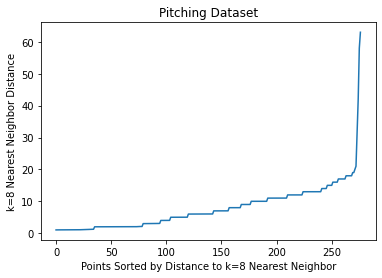

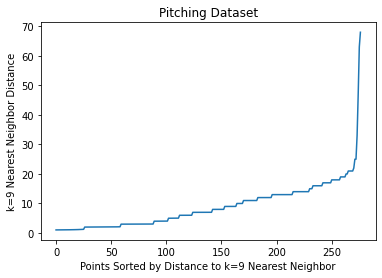

In [6]:
for k in range(2, 10):
    nbrs = NearestNeighbors(n_neighbors = k, algorithm = 'ball_tree').fit(X.drop(['Name', 'pitch_hand'], axis = 1))
    distances, indicies = nbrs.kneighbors(X.drop(['Name', 'pitch_hand'], axis = 1))
    
    plt.plot(np.sort(distances.T[k-1]))
    plt.xlabel('Points Sorted by Distance to k=%s Nearest Neighbor'%k)
    plt.ylabel('k=%s Nearest Neighbor Distance'%k)
    plt.title('Pitching Dataset')
    plt.show()

Using a k-Nearest Neighbors plot, a gradual increase in the graph followed by a large spike in the data indicates the existence of outliers. The spike in the graph occurs at the very end, suggesting that there are only around five or less points in our dataset that could be classified as outliers.

In the context of this study, I don't think any outliers should be removed since the dataset had already been restricted to pitchers with 250 or more plate appearances recorded during the 2024 regular season. This restriction was put into place to remove any of those extreme values caused by minimal pitching appearances throughout the season and short stints as well, so even though these algorithms and plots may suggest the existence of a few outlier points, those observations still contain valuable data that is pertinent to this study. If we were to drop these outliers, it may result in an inaccurate depiction of clusters that may exist in the dataset, leading to false conclusions made after our clustering. If we leave them in, we may see less parity in the resulting attributes of our clusters, but those attribute values will paint a better picture of what was seen in the 2024 MLB season. Because of this, they should still be clustered with the larger clusters that the algorithms eventually detect.

Typically, outliers would impact the algorithms chosen to analyze this dataset, but since there are so few outliers suggested and the suggestions are weak as well, they will have little impact on the algorithms chosen in this study, especially since the data has yet to be scaled accordingly.

Next, we will check for noise in the dataset.

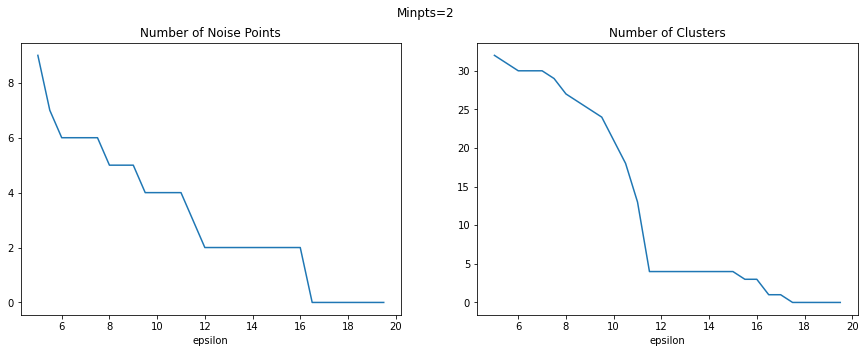

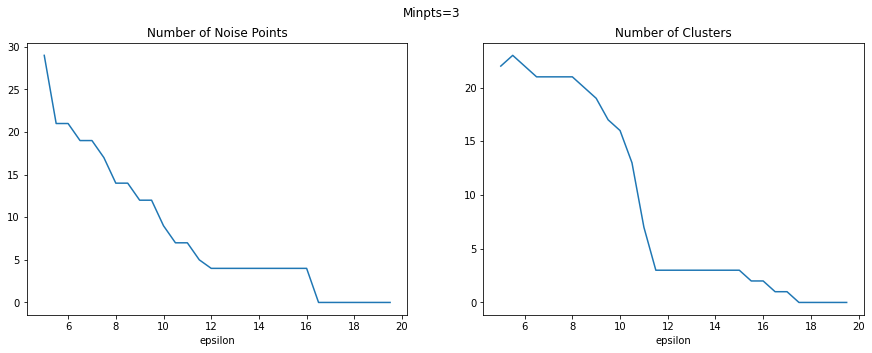

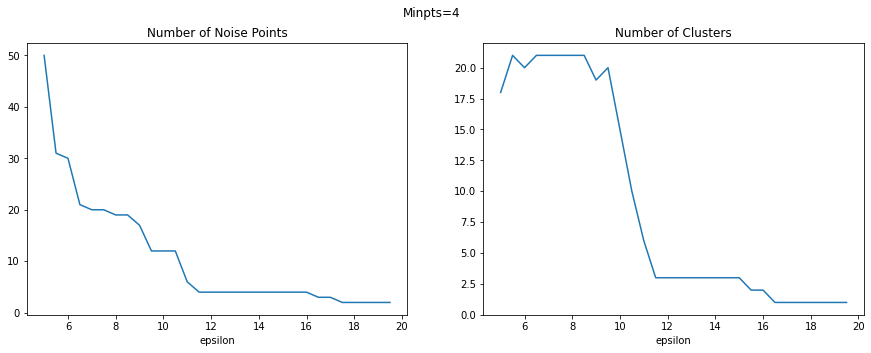

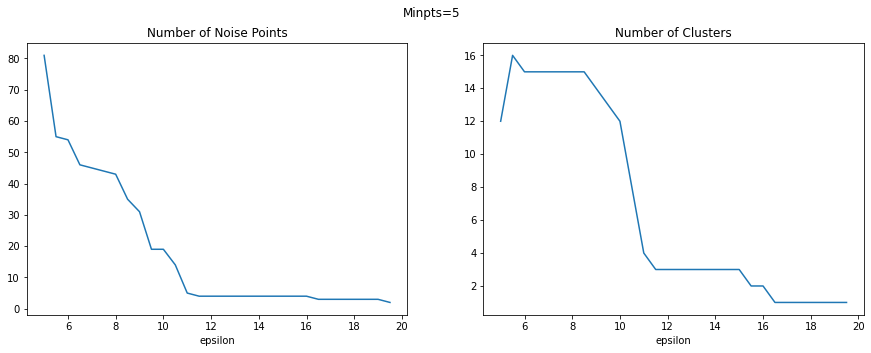

In [7]:
for minpts in [2,3,4,5]:
    num_clusters = []
    num_noise_points = []
    
    num_clusters_p = []
    num_noise_points_p = []
    
    for eps in np.arange(5, 20, 0.5):
        dst = DBSCAN(eps = eps, min_samples = minpts, metric = 'euclidean')
        X['predicted_cluster'] = dst.fit_predict(X.drop(['Name', 'pitch_hand'], axis = 1))
        
        X_no_noise = X[X['predicted_cluster'] != -1]
        
        k = len(X['predicted_cluster'].value_counts())-1
        num_clusters.append(k)
        
        noise_point_num = len(X[X['predicted_cluster']==-1])
        num_noise_points.append(noise_point_num)
        
    fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex = True)
        
    eps = np.arange(5, 20, 0.5)
    fig.suptitle('Minpts=%s'%minpts)
    ax[0].plot(eps, num_noise_points)
    ax[1].plot(eps, num_clusters)
    
    ax[0].set_title('Number of Noise Points')
    ax[1].set_title('Number of Clusters')
    
    ax[0].set_xlabel('epsilon')
    ax[1].set_xlabel('epsilon')
    plt.show()

Creating a graph of noise points per number of clusters that the DBSCAN algorithm detects, there appears to be a few noise points in the data when a low value of epsilon is used. With larger values of epsilon and more clusters, however, the amount of noise points diminishes. This could imply that there are either very few noise points in the dataset, or the clusters featured in the data lack separation and some of the border points are misclassified as noise points. If there were to be a significant amount of noise within the dataset, then similiary to the reasoning for the outliers, they should be left in the data in order for the clusterings to result in more accurate depictions of the attribute values of each group.

After analyzing the dataset for outliers and noise and determining to keep all the points in the dataset, no further data cleaning steps need to be taken and the study will move on with the dataset as is.

## 4. Basic Descriptive Analytics

In [47]:
X = X.drop(['predicted_cluster'], axis = 1)

X.describe()

PA   k_percent  bb_percent        woba  barrel_batted_rate  \
count  277.000000  277.000000  277.000000  277.000000          277.000000   
mean   456.086643    0.229874    0.079130    0.304040            0.077101   
std    184.758478    0.050908    0.023606    0.036214            0.020137   
min    250.000000    0.094000    0.021000    0.175000            0.017000   
25%    285.000000    0.195000    0.062000    0.282000            0.065000   
50%    390.000000    0.224000    0.077000    0.305000            0.077000   
75%    632.000000    0.263000    0.094000    0.325000            0.089000   
max    841.000000    0.378000    0.144000    0.413000            0.137000   

       hard_hit_percent  whiff_percent  swing_percent  n_fastball  n_breaking  \
count        277.000000     277.000000     277.000000  277.000000  277.000000   
mean           0.386043       0.253863       0.482603    0.566354    0.296404   
std            0.041868       0.047537       0.027626    0.115366    0.126534   
min            0.270000       0.128000       0.421000    0.313000    0.000000   
25%            0.361000       0.220000       0.463000    0.484000    0.212000   
50%            0.388000       0.248000       0.483000    0.556000    0.302000   
75%            0.415000       0.286000       0.500000    0.633000    0.384000   
max            0.500000       0.405000       0.563000    0.997000    0.639000   

       n_offspeed  
count  277.000000  
mean     0.137242  
std      0.101878  
min      0.000000  
25%      0.054000  
50%      0.126000  
75%      0.205000  
max      0.536000

After calculating summary statistics for each of the attributes in the dataset, we see very even scales for each of the mean and standard deviation values. The only attribute that differs from the rest is plate appearances, which is reasonable because of its nature as a cumulative value and not a ratio. In order to prevent these values from skewing the results of the clusterings, scaling the PA value will be considered.

In [48]:
df['pitch_hand'].value_counts()

R    206
L     71
Name: pitch_hand, dtype: int64

The lone pre-assigned class label included in our dataset is the handedness of each pitcher. Tallying those values, we see a total of 206 right-handed pitchers and only 71 left-handed pitchers.

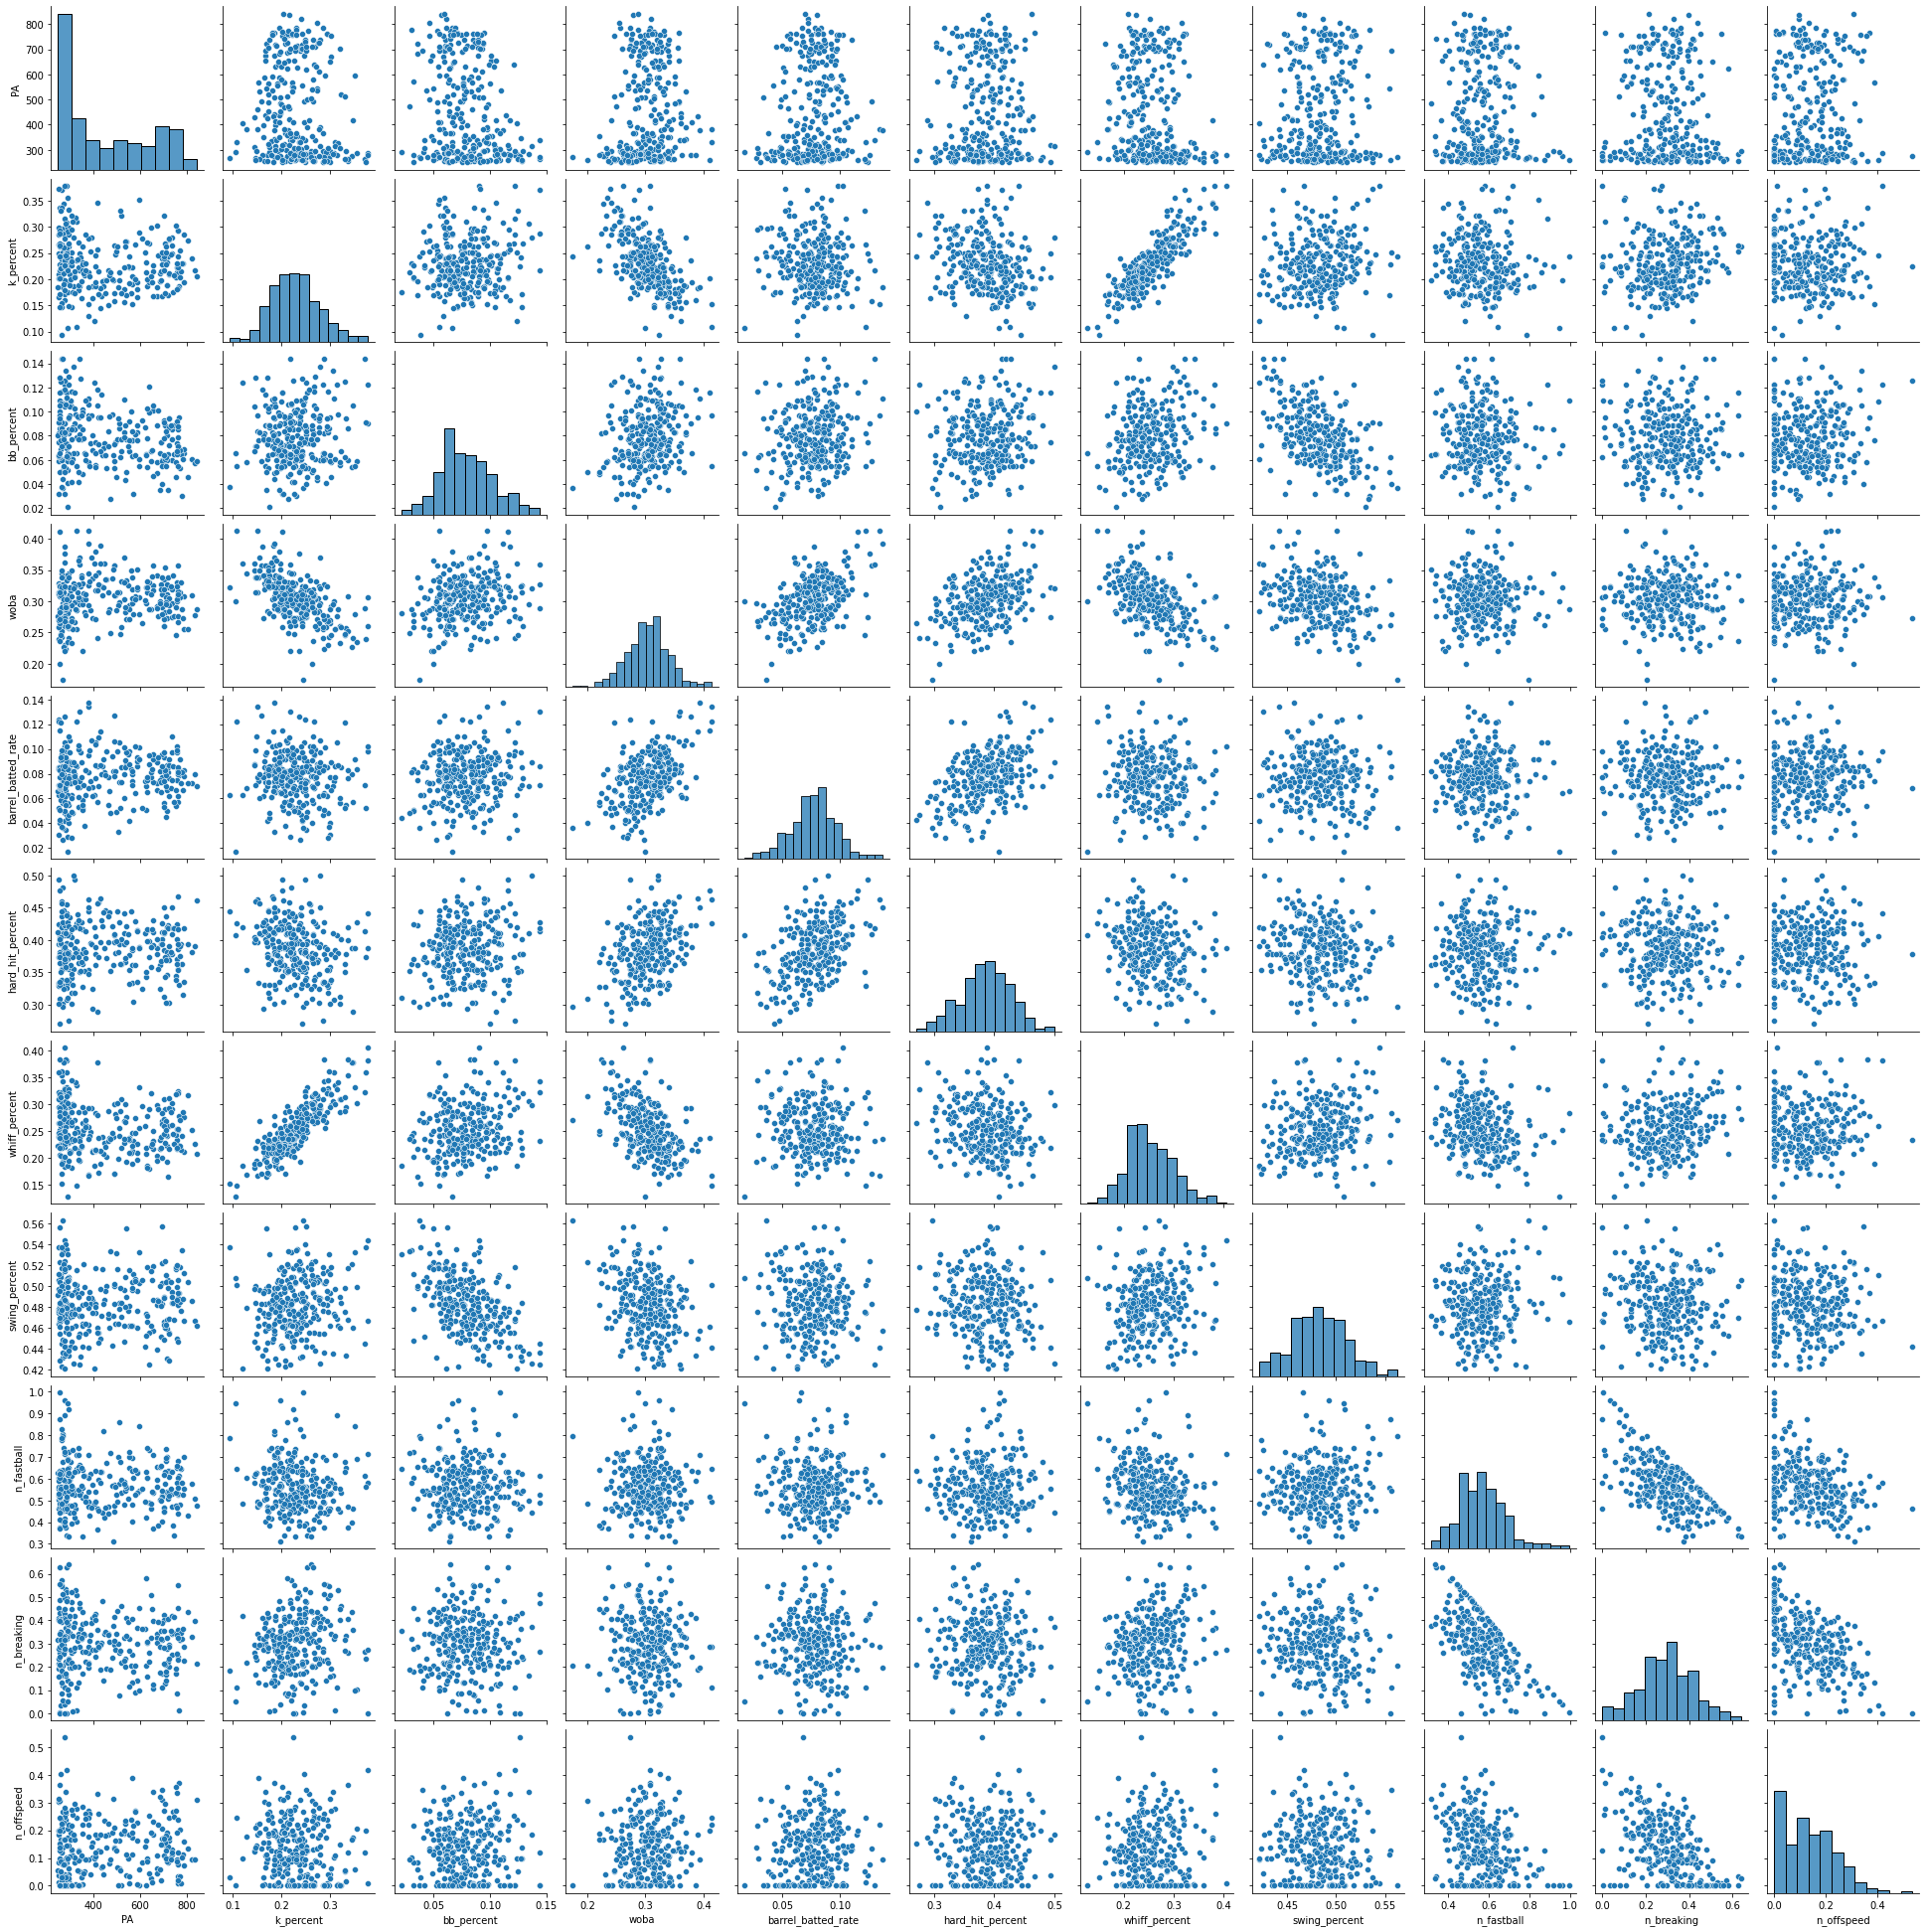

In [49]:
sns.pairplot(X.drop(['Name', 'pitch_hand'], axis = 1))
plt.show()

Lastly, the strongest pairwise relationship seen between any two variables is between "whiff_percentage" and "k_percentage." The variables "barrel_batted_rate" and "hard_hit_percentage" also appear to have a moderate positive correlation, and we see some negative correlation between our pitch arsenal statistics, like fastball percentage and breaking ball percentage. Aside from those, many of the pairwise relationships between variables appears to have no sort of positive or negative correlation.

## 5. Scaling Decisions

Because all of the variables in the dataset are ratio values that fall between 0 and 1, they share even scales and therefore do not need any sort of modification. The only variable that is not a ratio is plate appearances, and because of the large nature of those values, their mean, and their standard deviation, we will scale "PA" to avoid skewing our results largely in one direction.

In [11]:
X.head()

Name   PA  k_percent  bb_percent   woba  barrel_batted_rate  \
0  Verlander, Justin  396      0.187       0.068  0.337               0.069   
1      Chavez, Jesse  264      0.208       0.072  0.315               0.063   
2    Morton, Charlie  701      0.238       0.093  0.335               0.093   
3        Lynn, Lance  511      0.213       0.086  0.314               0.105   
4   Carrasco, Carlos  447      0.199       0.074  0.360               0.081   

   hard_hit_percent  whiff_percent  swing_percent pitch_hand  n_fastball  \
0             0.325          0.213          0.487          R       0.487   
1             0.354          0.170          0.423          R       0.780   
2             0.384          0.261          0.466          R       0.466   
3             0.393          0.241          0.484          R       0.862   
4             0.388          0.227          0.487          R       0.423   

   n_breaking  n_offspeed  predicted_cluster  
0       0.412       0.101                  0  
1       0.086       0.134                  0  
2       0.424       0.110                  0  
3       0.075       0.063                  0  
4       0.344       0.233                  0

In [12]:
X_scale = X[['PA']]

ss = StandardScaler()

X_stand_array = ss.fit_transform(X_scale)

X_scale = pd.DataFrame(X_stand_array, columns = X_scale.columns)
X_scale.head()

PA
0 -0.325806
1 -1.041545
2  1.327986
3  0.297755
4 -0.049270

In [13]:
df_scale = pd.concat([X_scale, X.drop(['PA'], axis = 1)], axis = 1).drop(['Name', 'pitch_hand'], axis = 1)
df_scale.head()

PA  k_percent  bb_percent   woba  barrel_batted_rate  \
0 -0.325806      0.187       0.068  0.337               0.069   
1 -1.041545      0.208       0.072  0.315               0.063   
2  1.327986      0.238       0.093  0.335               0.093   
3  0.297755      0.213       0.086  0.314               0.105   
4 -0.049270      0.199       0.074  0.360               0.081   

   hard_hit_percent  whiff_percent  swing_percent  n_fastball  n_breaking  \
0             0.325          0.213          0.487       0.487       0.412   
1             0.354          0.170          0.423       0.780       0.086   
2             0.384          0.261          0.466       0.466       0.424   
3             0.393          0.241          0.484       0.862       0.075   
4             0.388          0.227          0.487       0.423       0.344   

   n_offspeed  predicted_cluster  
0       0.101                  0  
1       0.134                  0  
2       0.110                  0  
3       0.063                  0  
4       0.233                  0

After standardizing the plate appearance variable in the dataset, we come up with the above dataframe that will be used to determine the clusterability and clustering structure of the dataset.

## 6. Clusterability and Clustering Structure

The next step will be to derive a t-SNE plot of our data to discover the clusterability of the dataset.

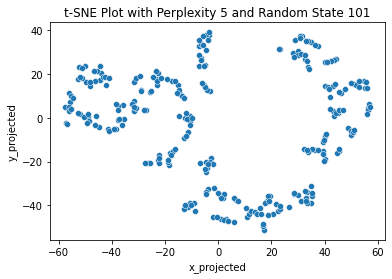

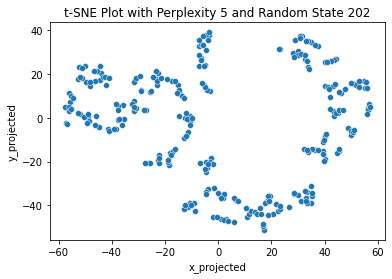

----------------------------


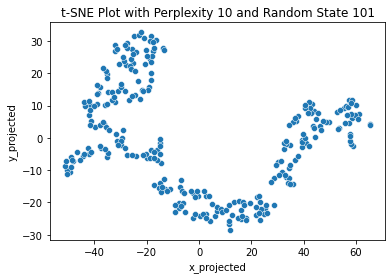

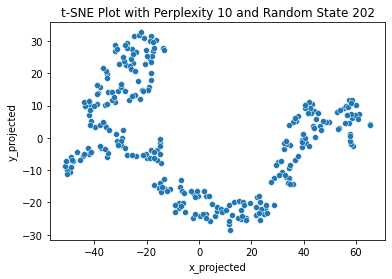

----------------------------


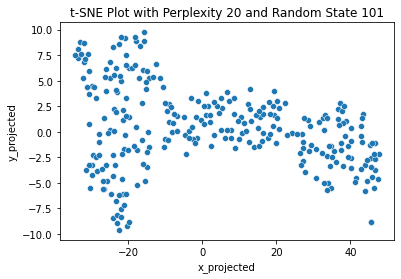

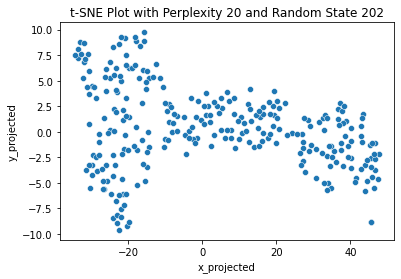

----------------------------


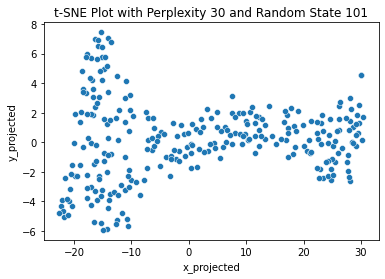

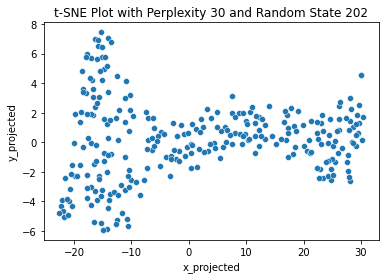

----------------------------


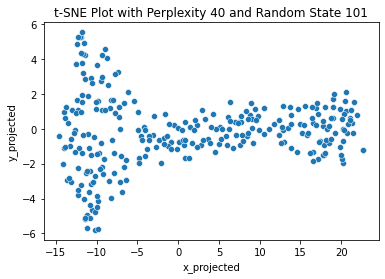

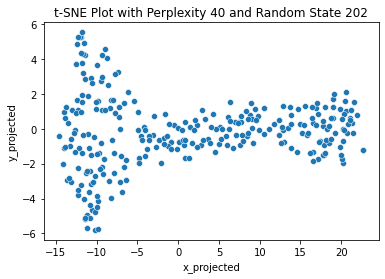

----------------------------


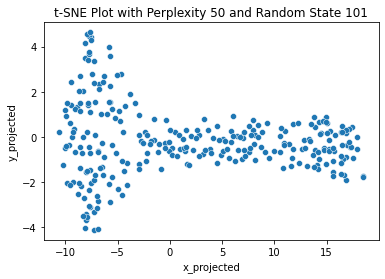

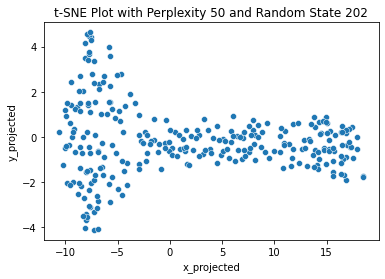

----------------------------


In [14]:
for perp in [5, 10, 20, 30, 40, 50]:
    for rs in [101, 202]:
        tsne = TSNE(n_components = 2, perplexity = perp, random_state = rs)
        data_tsne = tsne.fit_transform(df_scale)
        
        df_tsne = pd.DataFrame(data_tsne, columns = ['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis = 1)
        
        sns.scatterplot(x = 'x_projected', y = 'y_projected', data = df_combo)
        plt.title('t-SNE Plot with Perplexity %s and Random State %s'%(perp, rs))
        plt.show()
    print('----------------------------')

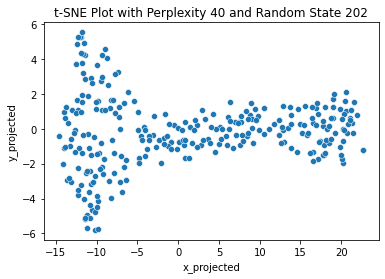

----------------------------


In [15]:
for perp in [40]:
    for rs in [202]:
        tsne = TSNE(n_components = 2, perplexity = perp, random_state = rs)
        data_tsne = tsne.fit_transform(df_scale)
        
        df_tsne = pd.DataFrame(data_tsne, columns = ['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis = 1)
        
        sns.scatterplot(x = 'x_projected', y = 'y_projected', data = df_combo)
        plt.title('t-SNE Plot with Perplexity %s and Random State %s'%(perp, rs))
        plt.show()
    print('----------------------------')

After using six different perplexity values and two different random states to create twelve iterations of a t-SNE plot, the t-SNE plot does suggest there is clusterability within the dataset. The lower perplexity values show plots that display small clusters of few points and string shapes, but as the perplexity values increase, a more balanced clustering structure with spherical shapes begin to form.

Choosing the t-SNE plot with a perplexity value of 40 and a random state of 202, the plot suggests that our data contains 3 inherent clusters. The cluster shapes are relatively spherical and generally balanced in size. The cluster on the left side of the scatterplot appears to be larger in size and contain a few more objects than the other two clusters, but overall the three inherent clusters are roughly balanced in size. There appears to be moderate cohesion within the clusters, but there is a lack of separation between them. We see a moderate amount of straddle points between each cluster that could have membership to more than one cluster. Lastly, there is some evidence to suggest nested clustering relationships within our inherent clusters, but overall the objects appear to be uniformally dispersed throughout the confines of its given cluster.

Lastly, a quick check will be done to see if there is any association between the categorical variable of pitcher hadnedness and the inherent clusters seen in the t-SNE plot.

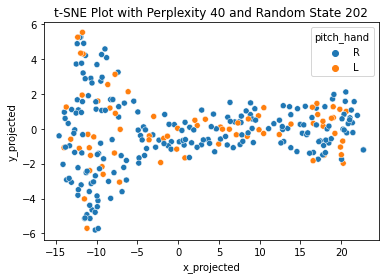

In [16]:
for perp in [40]:
    for rs in [202]:
        tsne = TSNE(n_components = 2, perplexity = perp, random_state = rs)
        data_tsne = tsne.fit_transform(df_scale)
        
        df_tsne = pd.DataFrame(data_tsne, columns = ['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis = 1)
        
        sns.scatterplot(x = 'x_projected', y = 'y_projected', hue = 'pitch_hand', data = df_combo)
        plt.title('t-SNE Plot with Perplexity %s and Random State %s'%(perp, rs))
        plt.xlabel('x_projected')
        plt.ylabel('y_projected')
        plt.show()

After color coding for pitcher handedness, there does not appear to be any association between this categorical variable and the inherent clusters in the t-SNE plot. Both right-handed and left-handed pitchers are very evenly distributed throughout the scatterplot.

Despite the useful information t-SNE plots allows users to derive from higher-dimensional datasets, there are still a few drawbacks with the algorithm that the final plots are not able to suggest. First and foremost, the distance between objects in the original dataset cannot be discovered using the t-SNE algorithm. The t-SNE algorithm allows for the visualizations of "neighbors" in the original dataset, but since that dataset is multidimensional in nature, there is no way of calculating a Euclidean distance that exists between two points. Second, the t-SNE plot is unable to detect distance between actual clusters. Similarly to the object distances, the t-SNE plot is unable to calculate a Euclidean distance between two or more clusters despite being able to visually represent whether those clusters are well-separated or not. It can be seen if there is well-separation, but it cannot be known what that distance that separates the clusters truly is. Third, the t-SNE algorithm is not able to determine the existence of noise or outliers within the original dataset. Lastly, the t-SNE algorithm is not a clustering algorithm of its own, and it cannot calculate the true cluster centroids or other summary statistics of the inherent clusters. The t-SNE algorithm is simply used for dimensionality reduction to visualize higher dimensional datasets on a 2-D plane. This algorithm helps view the existence of a clustering structure or not, but in order for that clustering to be found, other algorithms like k-means or hierarchical agglomerative clustering need to be used in order to find those clusters and their attributes.

## 7. Clustering Algorithm Selection Motivation

The first method of clustering that will be used is k-means clustering. The ideal dataset for k-means clustering features clusters that are uniform in size, spherical in shape, non-convex, highly cohesive, and well-separated as well. Despite a lack of separation and size disparity in one of the clusters, k-means can still be an effective form of clustering our dataset with the generally spherical shape of the clusters it displays. There also appears to be no significant outliers or noise that would skew any results of a k-means clustering, so k-means is still an effective algorithm in discovering these clusters. Lastly, k-means will be a good aid in the original research motivation. The goal of this study was to find groupings of MLB pitchers from the 2024 regular season and see if there were any disparities in numerical statistics and pitching arsenals. With a k-means clustering, we will be able to view boxplots of each numerical attribute that gives insight as to what separates these pitchers into the 3 inherent clusters we saw in the t-SNE plot.

After clustering the dataset using k-means clustering, a fuzzy c-means clustering will be used to get a more in-depth look at the straddle points that exist between the inherent clusters. Fuzzy c-means is an effective clustering algorithm for addressing cluster structures with a lack of separation. The t-SNE plot created for our dataset contains a handful of straddle nodes, which is an ideal dataset property for performing fuzzy c-means clustering. Secondly, clustering using fuzzy c-means will give each of our data points a cluster membership score, providing us with additional information about each observation than simply what cluster it is assigned to. Going back to our original research motivation, we would like to analyze the effectiveness of MLB pitchers for the 2025 season. If we have an observation that has split membership between two clusters, we would not hold too much weight of any conclusions drawn about one of those given cluster to that certain observation. One of our clusters may display a higher mean value in strikeout percentage, but if a point only has 50% membership to that cluster, we can say that there is evidence to suggest that given pitcher is still not effective when it comes to striking batters out. Lastly, calculating membership scores and analyzing the observations with the strongest scores will allow us to verify any conclusions we may draw from the k-means clustering. If we find that a given cluster has a high mean value for one of the attributes, but then we only look at the strongest members of that same cluster after the fuzzy c-means clustering and it yields completely different results, then we will know that those straddle points had a strong effect on the attribute values of that k-means clustering, and that that given cluster as a whole may be misleading in drawing certain conclusions.

Viewing the clustering structure that the dataset displays, I don't believe there would be much of a benefit to performing a Hierarchical Agglomerative Clustering. For starters, HAC with single linkage does not perform well with non-well-separated clusters. Because of the "closeness" of those border points, some clusters may get merged together too early on in the agglomerative clustering, therefore falsely identifying the clusters in our dataset. Also, HAC is effective for viewing subcluster relationships within the inherent clusters of the dataset. However, when initially viewing the t-SNE plot of the dataset, there did not appear to be many subclusters within the inherent clusters of the data. Because of that, using a hierarchical agglomerative clustering algorithm would likely not offer any insightful information about the clusterting structure or its features.

## 8. Clustering Algorithm #1



**K-MEANS CLUSTERING**

In order to perform k-means clustering, ideal parameter selection needs to be performed. Using a k-means elbow plot of inertia values and an average silhouette score plot, the ideal number of clusters for a k-means clustering will be calculated.

In [17]:
avg_inertia_list = []
    
for k in range(1, 20):
    sub_inertia_list = []
    for i in range(0, 4):
        kmeans = KMeans(n_clusters = k).fit(df_combo[['x_projected', 'y_projected']])
        sub_inertia_list.append(kmeans.inertia_)
        
    avg_inertia_list.append(np.average(sub_inertia_list))

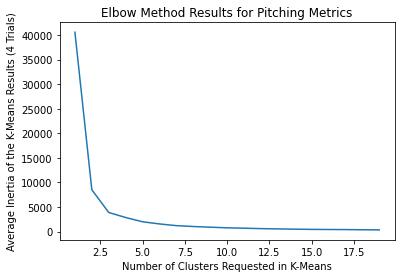

In [18]:
plt.plot(range(1, 20), avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-Means')
plt.ylabel('Average Inertia of the K-Means Results (4 Trials)')
plt.title('Elbow Method Results for Pitching Metrics')
plt.show()

In [19]:
cluster_num_list = range(2,15)

trial_num = 3

avg_avg_sil_score_list = []
for k in cluster_num_list:
    avg_sil_score_list = []
    for i in range(0, trial_num):
        kmeans = KMeans(n_clusters = k).fit(df_scale)
        
        cluster_labels = kmeans.labels_
        
        avg_sil_score = silhouette_score(df_scale, cluster_labels)
        
        avg_sil_score_list.append(avg_sil_score)
    avg_avg_sil_score_list.append(np.average(avg_sil_score_list))

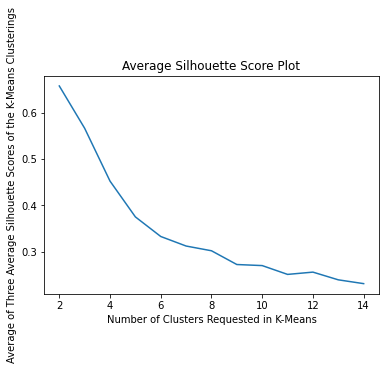

In [20]:
plt.plot(cluster_num_list, avg_avg_sil_score_list)
plt.xlabel('Number of Clusters Requested in K-Means')
plt.ylabel('Average of Three Average Silhouette Scores of the K-Means Clusterings')
plt.title('Average Silhouette Score Plot')
plt.show()

Because a strong elbow is displayed at k=3 clusters and there is still a relatively high average silhouette score at that same cluster value, it is determined that the best number of clusters to use while performing a k-means clustering is 3.

Next, k-means clustering with k=3 clusters will be performed on the data and a scatterplot color-coded by the cluster assignments will be created.

In [21]:
kmeans = KMeans(n_clusters = 3, random_state = 100).fit(df_scale)

df_combo['predicted_cluster'] = kmeans.labels_
df_combo.head()

Name   PA  k_percent  bb_percent   woba  barrel_batted_rate  \
0  Verlander, Justin  396       18.7         6.8  0.337                 6.9   
1      Chavez, Jesse  264       20.8         7.2  0.315                 6.3   
2    Morton, Charlie  701       23.8         9.3  0.335                 9.3   
3        Lynn, Lance  511       21.3         8.6  0.314                10.5   
4   Carrasco, Carlos  447       19.9         7.4  0.360                 8.1   

   hard_hit_percent  whiff_percent  swing_percent pitch_hand  n_fastball  \
0              32.5           21.3           48.7          R        48.7   
1              35.4           17.0           42.3          R        78.0   
2              38.4           26.1           46.6          R        46.6   
3              39.3           24.1           48.4          R        86.2   
4              38.8           22.7           48.7          R        42.3   

   n_breaking  n_offspeed  x_projected  y_projected  predicted_cluster  
0        41.2        10.1     0.131154    -0.742637                  0  
1         8.6        13.4   -11.378175     4.214400                  0  
2        42.4        11.0    16.937927     1.191277                  1  
3         7.5         6.3     6.355514     1.518174                  2  
4        34.4        23.3     2.852937    -0.914870                  2

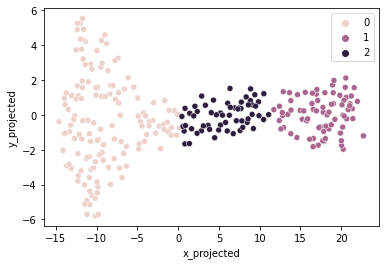

In [22]:
sns.scatterplot(x = 'x_projected', y = 'y_projected', hue = 'predicted_cluster', data = df_combo)
plt.legend(bbox_to_anchor = (1,1))
plt.show()

Above, we see our three inherent clusters represented by the t-SNE plot.

Now, we will analyze some cluster attributes of our three cluster assignments, like cluster cohesion and separation along with cluster sparsity.

In [23]:
df_sort = pd.concat([df_scale.drop(['predicted_cluster'], axis = 1), df_combo[['predicted_cluster']]], axis = 1)
df_sort = df_sort.sort_values(by = ['predicted_cluster'])
df_sort.head()

PA  k_percent  bb_percent   woba  barrel_batted_rate  \
0   -0.325806      0.187       0.068  0.337               0.069   
145 -1.074079      0.229       0.062  0.262               0.077   
148 -0.878877      0.262       0.065  0.302               0.078   
149 -0.629453      0.218       0.144  0.359               0.130   
150 -0.889722      0.291       0.041  0.259               0.063   

     hard_hit_percent  whiff_percent  swing_percent  n_fastball  n_breaking  \
0               0.325          0.213          0.487       0.487       0.412   
145             0.404          0.243          0.556       0.874       0.000   
148             0.373          0.273          0.506       0.336       0.639   
149             0.419          0.231          0.425       0.524       0.476   
150             0.370          0.266          0.505       0.687       0.141   

     n_offspeed  predicted_cluster  
0         0.101                  0  
145       0.126                  0  
148       0.025                  0  
149       0.000                  0  
150       0.172                  0

In [24]:
df_sort = df_sort.drop(['predicted_cluster'], axis = 1)
df_sort.head()

PA  k_percent  bb_percent   woba  barrel_batted_rate  \
0   -0.325806      0.187       0.068  0.337               0.069   
145 -1.074079      0.229       0.062  0.262               0.077   
148 -0.878877      0.262       0.065  0.302               0.078   
149 -0.629453      0.218       0.144  0.359               0.130   
150 -0.889722      0.291       0.041  0.259               0.063   

     hard_hit_percent  whiff_percent  swing_percent  n_fastball  n_breaking  \
0               0.325          0.213          0.487       0.487       0.412   
145             0.404          0.243          0.556       0.874       0.000   
148             0.373          0.273          0.506       0.336       0.639   
149             0.419          0.231          0.425       0.524       0.476   
150             0.370          0.266          0.505       0.687       0.141   

     n_offspeed  
0         0.101  
145       0.126  
148       0.025  
149       0.000  
150       0.172

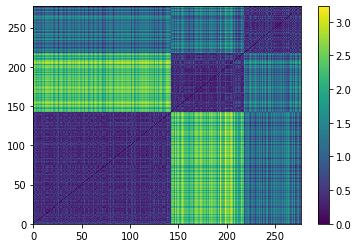

In [25]:
dist_mat = squareform(pdist(df_sort))

plt.pcolormesh(dist_mat)
plt.colorbar()
N = len(df_sort)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

The cluster-sorted similarity matrix above shows that each of the three clusters display strong cohesion. There also appears to be even sparsities in all of the clusters. However, there is also a low amount of separation between clusters 0 and 2 and clusters 1 and 2. Cluster 2 is the "middle" cluster that can be found between the other two clusters, so it reasonable that there is a lack of separation between cluster 2 and the other clusters.

In [26]:
def show_silhouette_plots(X, cluster_labels):
    
    n_clusters = len(np.unique(cluster_labels))
    
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor = color, edgecolor = color, alpha = 0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
        ax1.set_title("The Silhouette Plot for the Various Clusters")
        
        ax1.set_xlabel("The Silhouette Coefficient Values")
        ax1.set_ylabel("Cluster Label")
        
        ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
    plt.show()
    
    return

In [27]:
cluster_labels = kmeans.labels_

For n_clusters = 3 The average silhouette_score is : 0.5663250923253511


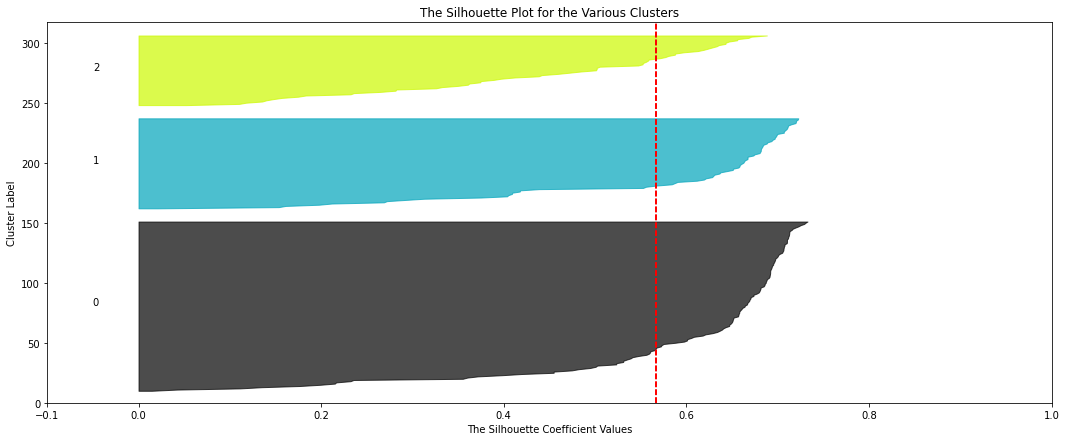

In [28]:
show_silhouette_plots(df_scale, cluster_labels)

Once again, strong cohesion is seen within each of the clusters, with an average silhouette score of all the clusters falling just below 0.6. Cluster 2 displays the least amount of separation from other clusters, containing points with lower silhouette scores on average than the other clusters.

When it comes to both the cluster-sorted similarity matrix and silhouette score plots, there is no reason to believe that these plots are misrepresentations of the cohesion and separation seen because of the nature of the clusters and its ideal properties for performing k-means clustering.

There is also no evidence to suggest that the k-means clustering "split" one of the inherent clusters in the dataset. Beginning with our parameter selection, it was suggested that our dataset featured 3 inherent clusters, and after performing k-means and deriving a cluster-sorted similarity matrix, we see an even amount of separation between the three clusters. We also don't see any negative silhouette scores, meaning that no point in the dataset is closer to another cluster than the one it was assigned to, so there is evidence to suggest that the clustering that was created was able to correctly identify the inherent clusters in the dataset.

Lastly, boxplots for each of the numerical attributes in our dataset will be created and compared across all three of the inherent clusters.

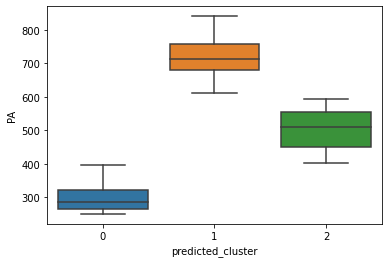

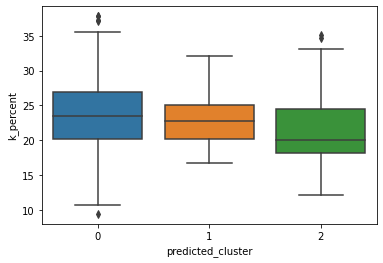

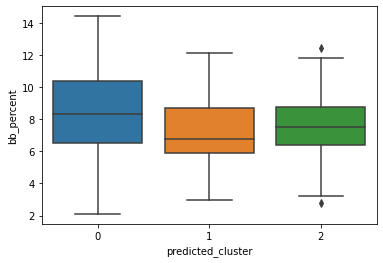

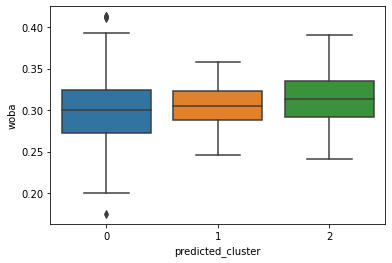

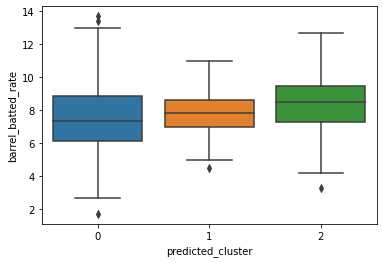

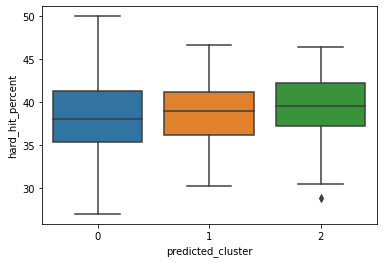

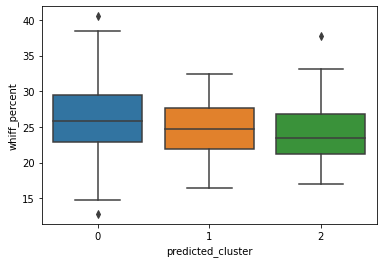

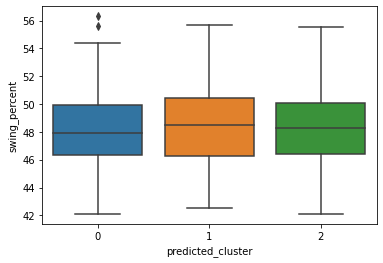

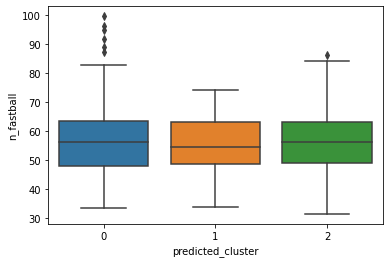

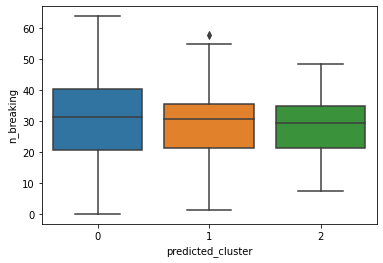

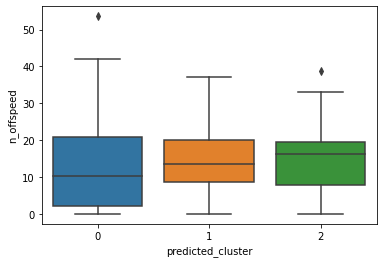

In [29]:
for col in df_combo.drop(['Name', 'pitch_hand', 'x_projected', 'y_projected', 'predicted_cluster'], axis = 1).columns:
    sns.boxplot(x = 'predicted_cluster', y = col, data = df_combo)
    plt.show()

Looking at the boxplots of each numerical attribute in the three clusters, a few notable observations can be made. First off, clusters 1 and 2 have very high values for plate appearances, with each cluster containing a mean value of over 500. Because of this, these clusters are likely comprised of starting pitchers who pitch more innings and face more batters than any relief pitcher in the dataset would. Therefore, it can also be assumed that cluster 0 is comprised of those relief pitchers who face less batters, or starting pitchers that may have missed some time due to injury but still played most of the season. After looking at the plate appearances, we see that cluster 2 features a lower mean value in strikeout percentages while clusters 0 and 1 feature relatively similar mean strikeout percentage value. Next, we see that cluster 1 features a lower walk percentage on average compared to its cluster counterparts. After that, we see very similar charts for three of our attributes: weighted on base average, barrel batted rate, and hard hit percentage. There is a gradual increase in mean values going from clusters 0 to 2, with cluster 2 featuring the highest mean. This shows us that pitchers in cluster 2 are allowing batters to make better contact with the ball and hit the ball harder than other pitchers do, along with inducing less swings and misses. Next, we don't see much difference in our attributes swing percentage, fastball percentage, and breaking percentage. However, when looking at our pitch arsenal values, we do notice that cluster 0 features a noticeably lower percentage of offspeed pitches thrown, and cluster 2 features a higher usage of offspeed pitchers.

To recap, after performing k-means clustering on our dataset, we see that cluster 2 features higher averages in quality of batter contact statistics like barrel rate and hard hit percentage. Cluster 2 also displays lower averages in strikeout rate and whiff percentage. Along with all of this as well, we see that cluster 2 features a higher usage of offspeed pitches. Overall, there is evidence to suggest that the usage of these offspeed pitches was less effective for pitchers during the 2024 MLB season and batters were able to make better and harder contact with pitchers that utilized these pitches.

## 9. Clustering Algorithm #2

**FUZZY C-MEANS**

Similarly to our k-means clustering, ideal parameter selection needs to be performed for fuzzy c-means. Because fuzzy c-means will be using the same t-SNE plot representation as k-means, we will continue to assume that k=3 is the ideal number of clusters to use in fuzzy c-means as well. However, for fuzzy c-means, we need to derive an ideal value for our weight parameter p in order to select how "fuzzy" we would like our results to be.

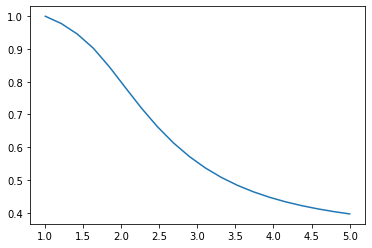

In [52]:
p_list = []
ndpc_list = []

for p in np.linspace(1.01, 5, 20):
        centroids, W, _, _, obj_history, _, ndpc = cmeans(df_scale.T, c=3, m=p, error = 1e-6, maxiter = 20000, seed = 100)
        
        p_list.append(p)
        ndpc_list.append(ndpc)
        
plt.plot(p_list, ndpc_list)
plt.show()

In [54]:
pd.DataFrame(data = {'p': p_list, 'ndpc': ndpc_list}).T

0         1         2         3         4         5         6   \
p     1.010000  1.220000  1.430000  1.640000  1.850000  2.060000  2.270000   
ndpc  0.999994  0.977728  0.945585  0.902287  0.845576  0.782184  0.719668   

            7        8         9         10        11        12        13  \
p     2.480000  2.69000  2.900000  3.110000  3.320000  3.530000  3.740000   
ndpc  0.662728  0.61327  0.571441  0.536545  0.507605  0.483633  0.463747   

            14        15        16        17        18        19  
p     3.950000  4.160000  4.370000  4.580000  4.790000  5.000000  
ndpc  0.447197  0.433366  0.421746  0.411927  0.403579  0.396439

The purpose of using a fuzzy clustering is to yield membership scores to various clusters, but we would still also like for there to be evident assignment of those points that are near the centroids of each cluster. By choosing a parameter of p=2.69, we calculate a Normalized Dunn's Partitioning Coefficient of 0.61, meaning our clustering still offers a harder assignment, but we still get that fuzziness that allows for the detection of those border points that may share cluster membership with another cluster.

Now, using that weight exponent of p=2.69 and k=3 clusters, fuzzy c-means will be performed on the dataset.

--------------------------
Analysis for c=3 and p=2.69
Normalized Dunning Partitional Coefficient:  0.613269586271534
Final Objective Function Value:  16.815010952811733


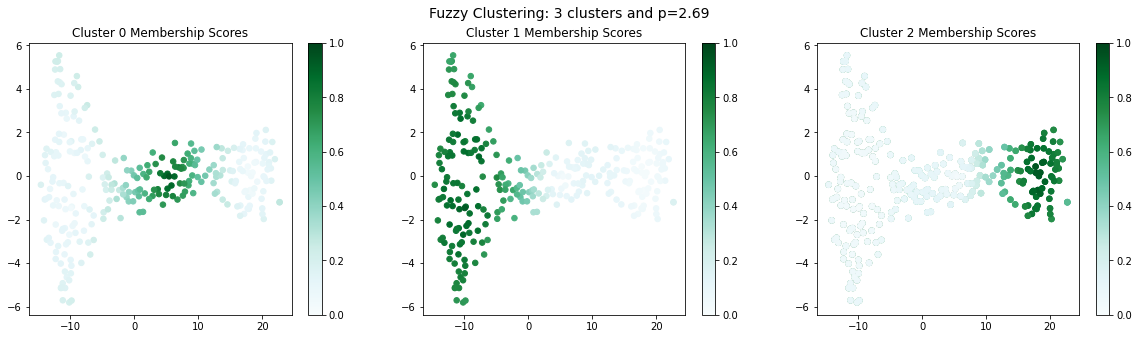

In [32]:
c = 3
p = 2.69

W_list = []

ndpc_list = []

centroids_list = []

print('--------------------------')
print('Analysis for c=%s and p=%s'%(c, p))
    
centroids, W, _, _, obj_history, _, ndpc = cmeans(df_scale.T, c=3, m=p, error = 1e-6, maxiter = 20000, seed = 100)
    
print('Normalized Dunning Partitional Coefficient: ', ndpc)
print('Final Objective Function Value: ', obj_history[len(obj_history)-1])
    
W_list.append(W)
ndpc_list.append(ndpc)
centroids_list.append(centroids)
    
fig, ax = plt.subplots(1, 3, figsize = (20,5))
plt.suptitle('Fuzzy Clustering: %s clusters and p=%s'%(c,p), fontsize=14)
for i in range(0, 3):
    df_combo['Cluster %s Membership Score'%str(i)] = W[i,:]
        
    points = plt.scatter(df_combo['x_projected'], df_combo['y_projected'],
                             c = df_combo['Cluster %s Membership Score'%str(i)],
                             s=30, cmap = "BuGn",
                             vmin = 0, vmax = 1)
    ax[i].scatter(df_combo['x_projected'], df_combo['y_projected'],
                                                 c = df_combo['Cluster %s Membership Score'%str(i)],
                                                 s=30, cmap = "BuGn",
                                                 vmin = 0, vmax = 1)
        
    fig.colorbar(points, ax = ax[i])
    ax[i].set_title('Cluster %s Membership Scores'%(str(i)))
plt.show()

In the fuzzy c-means plots, we see the same overall clusters that were found during the k-means clustering, but we are now able to see less weight in the cluster assignments for those straddle nodes that are in between two of the three clusters.

In order to analyze the separation of each of the clusters, the maximum membership score of each observation will be found and plotted on a histogram with the corresponding cluster that membership score belongs to.

In [33]:
membership_score_df = df_combo[['Cluster 0 Membership Score', 'Cluster 1 Membership Score', 'Cluster 2 Membership Score']]
membership_score_df.head()

Cluster 0 Membership Score  Cluster 1 Membership Score  \
0                    0.458992                    0.423905   
1                    0.169122                    0.753643   
2                    0.107941                    0.048897   
3                    0.657850                    0.165785   
4                    0.690271                    0.202221   

   Cluster 2 Membership Score  
0                    0.117104  
1                    0.077235  
2                    0.843162  
3                    0.176366  
4                    0.107508

(array([ 7.,  8.,  5., 10.,  7.,  9.,  4., 15.,  9., 11., 16.,  9., 23.,
        23., 29., 38., 22., 18.,  7.,  7.]),
 array([0.44923609, 0.47387005, 0.49850401, 0.52313797, 0.54777193,
        0.57240589, 0.59703985, 0.62167381, 0.64630776, 0.67094172,
        0.69557568, 0.72020964, 0.7448436 , 0.76947756, 0.79411152,
        0.81874548, 0.84337944, 0.8680134 , 0.89264736, 0.91728132,
        0.94191528]),
 <BarContainer object of 20 artists>)

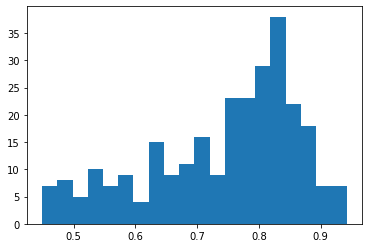

In [34]:
plt.hist(membership_score_df.T.max(), bins = 20)

Viewing this histogram, we see that there are high density of points that are well separated from the other clusters because of their high memberships scores to the cluster they are assigned to. Our graph, however, still does display a moderate distribution of low maximum membership scores, suggesting that a handful of points in the dataset have split membership between clusters, signifying low separation between our cluster structures.

Now, using the clustering assignments from the k-means clustering, we will create a histogram for each of the three clusters and the membership scores that the assigned observations display to that given cluster. This will allow for a visualization of the cohesion within each cluster.

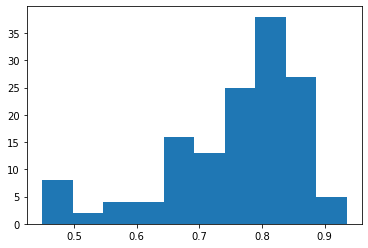

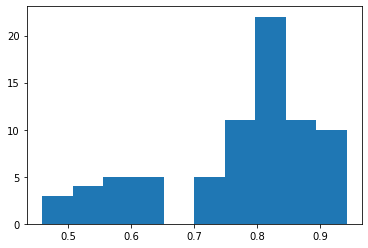

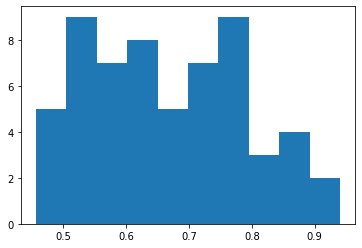

In [35]:
cluster_memberships = pd.concat([membership_score_df, df_combo[['predicted_cluster']]], axis = 1)

for i in range(0,3):
    plt.hist(cluster_memberships[cluster_memberships['predicted_cluster'] == i].drop(['predicted_cluster'], axis = 1).T.max(), bins = 10)
    plt.show()

Using the k-means cluster predictions as pre-assigned class labels, we see that cluster 2 has the least amount of cohesion, as a large distribution of its members have split membership with another cluster in the plot. Clusters 0 and 1 also feature a small distribution of observations that have split membership with another cluster, but a higher distribution of points in each of clusters 0 and 1 have harder assignments, suggesting strong overall cohesion.

Lastly, to analyze cohesion and separation in the fuzzy c-means clustering, we will find the max value of each object's membership score distribution and assign it to that cluster. Using those assignments, we will created a cluster-sorted similarity matrix and silhouette score plot and compare it to the k-means clustering.

In [36]:
warnings.filterwarnings('ignore')

membership_score_df['cluster_assignment'] = 0
membership_score_df.head()

Cluster 0 Membership Score  Cluster 1 Membership Score  \
0                    0.458992                    0.423905   
1                    0.169122                    0.753643   
2                    0.107941                    0.048897   
3                    0.657850                    0.165785   
4                    0.690271                    0.202221   

   Cluster 2 Membership Score  cluster_assignment  
0                    0.117104                   0  
1                    0.077235                   0  
2                    0.843162                   0  
3                    0.176366                   0  
4                    0.107508                   0

In [37]:
warnings.filterwarnings('ignore')

for i in range(0, len(membership_score_df)):
    mem_score = membership_score_df.drop(['cluster_assignment'], axis = 1).iloc[i,:].max()
    
    # Cluster assignment will be based off of the cluster labels in k-means
    # For example, Cluster 0 in the fuzzy clustering is what Cluster 2 in the k-means clustering was,
    #     so we will assign observations with high cluster 0 membership to cluster 2
    
    if membership_score_df.iloc[i,0] == mem_score:
        membership_score_df.iloc[i,3] = int(2)
    elif membership_score_df.iloc[i,1] == mem_score:
        membership_score_df.iloc[i,3] = int(0)
    else:
        membership_score_df.iloc[i,3] = int(1)
        
membership_score_df.head()

Cluster 0 Membership Score  Cluster 1 Membership Score  \
0                    0.458992                    0.423905   
1                    0.169122                    0.753643   
2                    0.107941                    0.048897   
3                    0.657850                    0.165785   
4                    0.690271                    0.202221   

   Cluster 2 Membership Score  cluster_assignment  
0                    0.117104                   2  
1                    0.077235                   0  
2                    0.843162                   1  
3                    0.176366                   2  
4                    0.107508                   2

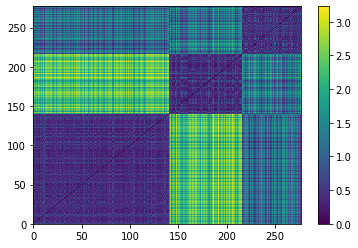

In [39]:
df_sort_fuzzy = pd.concat([df_scale.drop(['predicted_cluster'], axis = 1), membership_score_df[['cluster_assignment']]], axis = 1)
df_sort_fuzzy = df_sort_fuzzy.sort_values(by = ['cluster_assignment'])
df_sort_fuzzy = df_sort_fuzzy.drop(['cluster_assignment'], axis = 1)

dist_mat_fuzzy = squareform(pdist(df_sort_fuzzy))

plt.pcolormesh(dist_mat_fuzzy)
plt.colorbar()
N = len(df_sort)
plt.xlim([0,N])
plt.ylim([0,N])
plt.show()

Similarly to the k-means clustering, the fuzzy c-means clustering produces a distance matrix that displays cohesion within the clusters along with a lack of separation between clusters 1 and 2 and clusters 0 and 2. In this distance matrix representation, however, there does seem to be a little bit less cohesion within cluster 2 than there was in the k-means clustering. This could show that the "fuzziness" of cluster 2 called for some of its original points in the k-means clustering having a larger membership score to a different cluster in this iteration of the fuzzy c-means clustering.

There is not significant evidence to suggest that one of the "inherent" clusters in the dataset was split or that one cluster contained two smalled "inherent" clusters. After performing fuzzy c-means clustering, the overall clusters that were formed were the same as the k-means clustering. The only difference was the value of the cluster membership of a few of the points, and while a few of those border points may have been classified to a different cluster than it was in k-means, the main "inherent" clusters remained the same in the fuzzy c-means clustering.

The overall goal of performing fuzzy c-means was to find the observations with the strongest membership scores and see if their attribute values held up the conclusions that were drawn during the k-means clustering. By using the new cluster assignments from the fuzzy c-means clustering, boxplot visualizations will be made for each of the clusters with the observations in that given cluster that were considered "strong." These "strong" observations are characterized by having a cluster membership score of 0.75 or greater.

In [40]:
df_strong = df_combo.copy()
df_strong = df_strong.drop(['predicted_cluster'], axis = 1)
df_strong = pd.concat([df_strong, membership_score_df['cluster_assignment']], axis = 1)

In [41]:
cluster_strong = pd.concat([df_strong[df_strong['Cluster 0 Membership Score'] >= 0.75],
                            df_strong[df_strong['Cluster 1 Membership Score'] >= 0.75],
                            df_strong[df_strong['Cluster 2 Membership Score'] >= 0.75]])

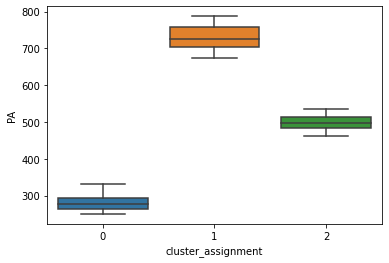

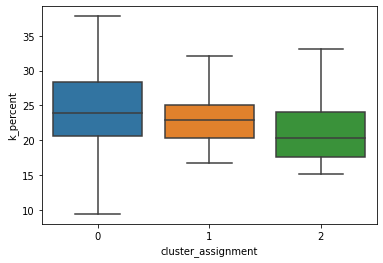

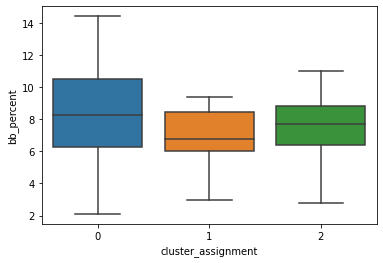

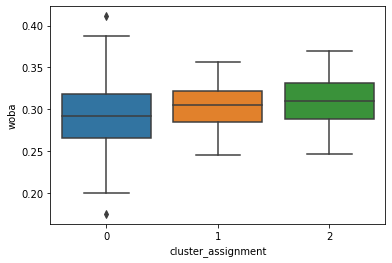

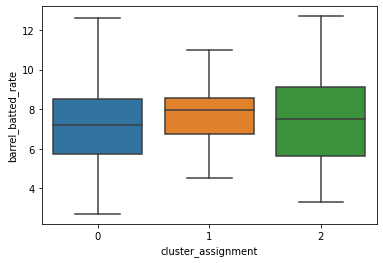

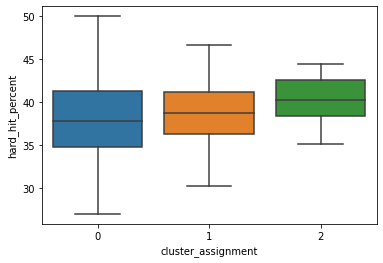

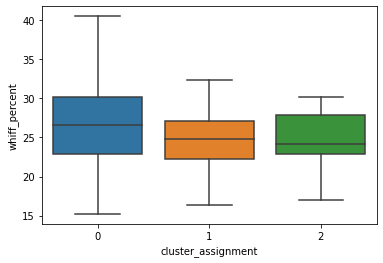

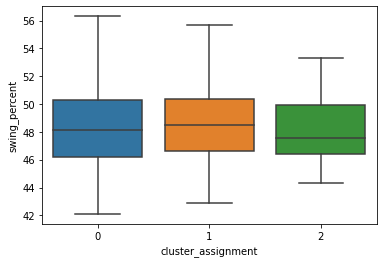

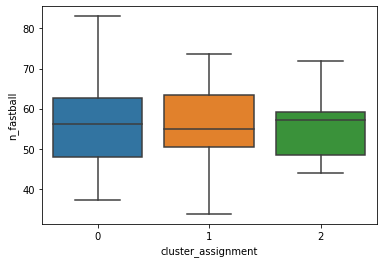

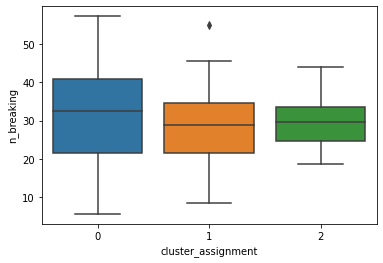

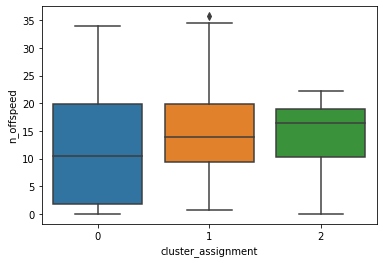

In [42]:
for col in cluster_strong.drop(['Name', 'pitch_hand', 'x_projected', 'y_projected', 'cluster_assignment', 'Cluster 0 Membership Score', 'Cluster 1 Membership Score', 'Cluster 2 Membership Score'], axis = 1).columns:
    sns.boxplot(x = 'cluster_assignment', y = col, data = cluster_strong)
    plt.show()

In [43]:
cluster_strong['cluster_assignment'].value_counts()

0    94
1    54
2    18
Name: cluster_assignment, dtype: int64

In [44]:
df_combo['predicted_cluster'].value_counts()

0    142
1     76
2     59
Name: predicted_cluster, dtype: int64

When looking at the amount of "strong" observations in each of the three clusters, the first observation is that cluster 1 retained the most amount of it's points, meaning that its clustering found by k-means was a fairly strong clustering to begin with. Cluster 0 lost around 50 of its original observations made using k-means, while cluster 2 also lost around 40 points. Next, we observe a similar descending trend in mean strikeout percentage from cluster 0 to cluster 2

Now, looking at the results of the boxplot vizualizations, a very similar trend to the results of the k-means clustering is noticed. First off, the distribution of cluster means for plate appearances is very similar to the k-means clusters. Cluster 0 has a very low amount of plate appearances, signifying relief pitchers or short-term starters. We also see similar mean values and distributions for walk percentage and weighted on base average. The first noticeable change we see is in the mean value of barrel batted rate for cluster 2. Using the "strong" observations in fuzzy c-means clustering, we notice that this mean value is lower than its clustering using k-means. However, this is the only major change we see across the entire boxpot visualizations. The mean values for the rest of the attributes are consistent with the values seen in the k-means boxplots. We even see that same greater usage of offspeed pitches in the boxplots of our fuzzy c-means clustering, implying that there is still evidence to suggest that the usage of these offspeed pitches were less effective against MLB batters in 2024.

Because of the similarities between the k-means boxplots and the fuzzy c-means boxplots, we can say that the straddle nodes in each of the clusters identified by k-means clustering did not have a strong effect on the attribute values of each cluster. Again, if there were noticeable differences in the charts, then we would have been able to conclude that the straddle nodes were having a large amount of pull on the cluster attribute values and skewing the results of our visualizations. This being said, we can determine that both k-means and fuzzy c-means were able to effectively identify the inherent clusters that exist within the data, and from those clusters we were able to draw conclusions and hypothesize the lack of effectiveness of offspeed pitches in Major League Baseball.

## 10. Discussion

By calculating the adjusted rand score of our clustering assignments and analyzing both t-SNE plots, we will be able to compare the performances of our two clustering algorithms.

In [45]:
adjusted_rand_score(df_combo['predicted_cluster'], membership_score_df['cluster_assignment'])

0.9778835175576426

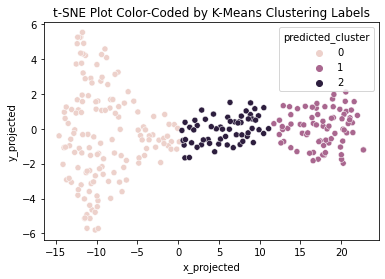

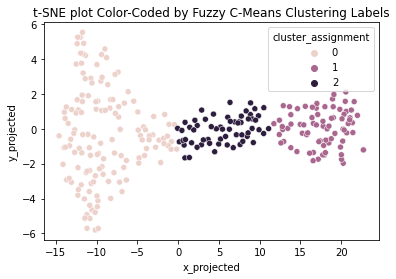

In [46]:
sns.scatterplot(x = 'x_projected', y = 'y_projected', hue = 'predicted_cluster', data = df_combo)
plt.title('t-SNE Plot Color-Coded by K-Means Clustering Labels')
plt.show()

sns.scatterplot(x = 'x_projected', y = 'y_projected', hue = membership_score_df['cluster_assignment'], data = df_combo)
plt.title('t-SNE plot Color-Coded by Fuzzy C-Means Clustering Labels')
plt.show()

When analyzing the results of our two clusterings, they performed virtually the same. The adjusted rand score between the two clustering assignments is between 0.97 and 1, meaning that all but one or two points were assigned to the same cluster in the fuzzy c-means assignment as it was in the k-means clustering. After comparing the t-SNE plots color-coded by each of the assignments by the two algorithms, it can also be seen that there were only a few border points that were classified differently based on the membership scores calculated during fuzzy c-means.

In terms of the effectiveness of each algorithm to identify the "inherent" clusters, there was not one algorithm that did a better job necessarily. Both algorithms were able to correctly and effectively identify the clusters in the dataset. Each algorithm simply allowed for different observations to be made about the data.

Similarly to their abilities to identify the clusters in the dataset, there is not necessarily much reason to "trust" one of the clustering results more than the other. Again, both algorithms were able to detect the inherent clusters and resulted in similar conclusions to be made about each of the clusters. The fuzzy c-means clustering just offered a more narrow calculation of those inherent clusters and allowed for a more refined representation of what was at the core of each of the three clusters. Because of the multifaceted and highly variable results we see in Major League Baseball, however, one could argue that the fuzzy clustering depicts a more accurate representation of a clustering formed using regular season pitching statistics from 2024, but there is no reason to "trust" the fuzzy c-means results more than those of the k-means clustering.

When comparing the boxplot visualizations of both the k-means clustering and fuzzy c-means clustering, both analyses produced similar conclusions. When looking at each set of boxplots, we noticed a higher density of offspeed pitch usage in cluster 2, higher mean values in batting metrics like wOBA and hard hit rate, and a lower mean value of strikeout percentage. These were the initial observations made with algorithm #1 that were refined and supported by the results of clustering #2. The only insights that were revealed by algorithm #2 that were not seen in algorithm #1 were that the border points that straddle multiple clusters did not have a great effect on the attribute values observed in each of the three clusters. If the cluster attribute values were different when only looking at the strongest membership assignments calculated during fuzzy c-means clustering, then that would have suggested the clustering found in k-means was either weak or incorrect. Since the results of the fuzzy c-means clustering upheld the observations made in the k-means clustering, it was signaled that these algorithms were able to correctly identify the inherent clusters, and from there, observations and hypotheses about the data were able to be made accordingly.

## 11. Conclusion

In conclusion, the overall goal of this study was to analyze MLB pitching statistics from the 2024 regular season and cluster pitchers based off of a given set of statistics in hopes of learning more about the effectiveness of certain types of pitches. Pitching is valued at an all time high, and this research was aimed towards discovering an aspect of pitching that might gives pitchers an advantage in their own game and general managers an advantage when looking for pitchers to add to their roster. To begin, a dataset with 2024 regular season pitching statistics was read into the notebook and checked for points that may be considered outliers or noise. Once the data was analyzed for these extreme values, certain variables were scaled accordingly and t-SNE plots were created to view the pointwise relationships in a two-dimensional plane. After viewing the results of the t-SNE plot, the clustering algorithms of k-means and fuzzy c-means were chose to perform cluster analysis on the data due to the spherical, cohesive, nonconvex, and non-well-separated nature of the inherent clusters that were observed. K-means clustering was able to identify the three inherent clusters in the dataset, and boxplot visualizations of the cluster attributes were created and compared with one another. After completing this analysis, fuzzy c-means was implemented to address the straddle nodes between each cluster that existed within the data. Once cluster membership scores were calculated for each observation, boxplox visualizations were created again but only using the "strong" members of each cluster to define its cluster attributes. The resulting attributes were able to corroborate the findings of the k-means clustering algorithm. Ultimately, we were able to learn that there is evidence to suggest a lack of effectiveness of offspeed pitches in Major League Baseball in 2024.

Because of the recent nature of this dataset, I would recommend that these insights be extracted and studied further by players and general managers looking to improve their pitching game. This is a very basic study used to learn about the statistics recorded by MLB pitchers during the 2024 season. Since the study was built off using unsupervised learning methods, the conclusions could merely be left at bigger-picture suggestions for what might be causing certain pitches to be effective and others to not. Because of this, it would not be a great model for predicting the effectiveness of given pitches in future MLB seasons. However, it is still worth studying and looking into for future reference because of the inherent clusters that were found and the disparities in the cluster attribute values.

One shortcoming of the analysis is the size of the dataset along with the nature of the observations it was restricted to. The sample size for the data was still only 277 observations, leaving some of the clusters with less than 100 points to analyze. Also, when it comes to the nature of the data, it is difficult to draw conclusions based off different types of pitchers that are included in the data. For example, one of our clusters featured much lower plate appearance values. Originally, it was assumed that these observations were all relief pitchers, but it could have also included starting pitchers that got hurt midway through the season and stopped recording in-game statistics. Along with this phenomenon comes the style of pitching. Because starting pitchers pitch for more innings in a game, they may tend to approach batters with a more reserved pitching style. Relief pitchers that only come into the game for three outs, on the other hand, may tend to attack hitters and challenge them on every single pitch. These two distinct styles can result in very different makeups of statistics, but these observations may have gotten lumped together in the same cluster due to an injury that left a starting pitcher with the same season average plate appearances that a relief pitcher usually sees. Lastly, some pitchers split time throughout the season as a starter and a relief pitcher, recording statistics in both aspects. If I were to do this study again differently, I would split that time statistic into two variables that would denote innings pitched as a starting pitcher and innings pitched in relief.

Following this research, an idea for a future study would be to analyze the specific pitches within each pitch group. Instead of just looking at breaking ball usage, one could break that down into slider usage, curveball usage, along with other breaking pitches and run a similar study to search for clustering structures that are more niche. Another idea for further research would be to run a similar study on postseason statistics and see how pitching fares differently in the playoffs versus the regular season. Lastly, one more idea for future work on this would be to use more advanved anayltical attributes, like using the pitch axis of certain pitches and the revolutions per minute (RPM) that a pitcher averages on those pitches. The statistics used in this study in order to analyze the effectiveness of certain pitchers were more result based, but I think using statistics that tracked the specific attribtues of pitches and cross-analyzing those with the results that pitchers see may lead to more in-depth and refined conclusions drawn from a clustering algorithm. At the end of the day, there are many different hypotheses that can be formulated using this clustering study and many more ideas for research are able to be stemmed from the findings made here.

## References

- Baseball Savant. (n.d.). MLB Advanced Media, LP. https://baseballsavant.mlb.com/.
- Lebovitch, J. (2023). Baseball Pitches - A Comprehensive Guide. RPP Baseball. https://rocklandpeakperformance.com/baseball-pitches-a-comprehensive-guide/.
- Madison, B. (2024). "In Baseball, Just How Important is Pitching?". The Shepherdstown Chronicle. https://www.shepherdstownchronicle.com/sports/2024/02/02/in-baseball-just-how-important-is-pitching/#:~:text=Many%20baseball%20experts%20from%20Major,the%20ball%20toward%20the%20batter.
- Mahlke, A. (2023). "Economics, Baseball, and the Value of Pitching". Twins Daily News. https://twinsdaily.com/news-rumors/minnesota-twins/economics-baseball-and-the-value-of-pitching-r13581/.